In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn

from dinkum.display import MultiTissuePanel, tc_record_activity

import pandas as pd
from matplotlib import pyplot as plt


initializing: dinkum v0.5.0
start=1 stop=10


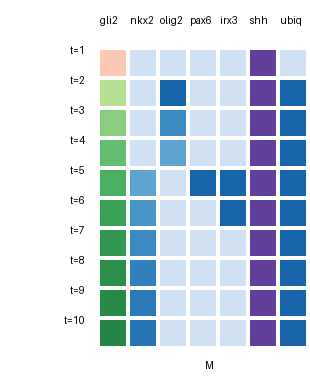

In [2]:
dinkum.reset()

m = Tissue(name='M')

shh = Ligand(name='shh')
gli2 = Receptor(name='gli2', ligand=shh)

nkx2 = Gene(name='nkx2')
olig2 = Gene(name='olig2')
pax6 = Gene(name='pax6')
irx3 = Gene(name='irx3')
ubiq = Gene(name='ubiq')


def growth_fn_shh(*, shh):
    growth = 1/4
    return shh.level + (100 - shh.level) * growth, True

def growth_fn_gli2(*, gli2):
    growth = 1/4
    return gli2.level + (100 - gli2.level) * growth, True


# CTB: make it possible to do ligand => receptor level communication
#shh.custom_activation(state_fn=growth_fn_shh)
shh.is_present(where=m, start=1)
gli2.custom_activation(state_fn=growth_fn_gli2)
ubiq.is_present(where=m, start=2)

def olig2_reg(*, gli2, nkx2, irx3):
    if gli2.level <= 50:
        return 100 - gli2.level, True

    return 0, False

def nkx2_reg(*, gli2, olig2, pax6, irx3):
    if gli2.level > 50:
        return gli2.level, True

    return 0, False

def irx3_reg(*, ubiq, nkx2, olig2):
    if nkx2.level > 60:
        return 0, False

    if olig2.level > 60:
        return 0, False

    return ubiq

def pax6_reg(*, ubiq, nkx2, olig2):
    if nkx2.level > 40:
        return 0, False

    if olig2.level > 60:
        return 0, False

    return ubiq

pax6.custom_activation(state_fn=pax6_reg)
irx3.custom_activation(state_fn=irx3_reg)
nkx2.custom_activation(state_fn=nkx2_reg)
olig2.custom_activation(state_fn=olig2_reg)

display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10,
                                                           gene_names=['gli2', 'nkx2', 'olig2', 'pax6', 'irx3'])
display_fn

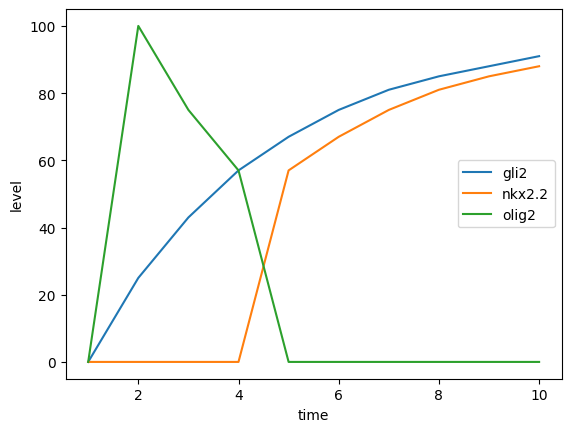

In [3]:
plt.plot(conc_df.index, conc_df.gli2, label='gli2')
plt.plot(conc_df.index, conc_df.nkx2, label='nkx2.2')
plt.plot(conc_df.index, conc_df.olig2, label='olig2')

plt.xlabel('time')
plt.ylabel('level')
plt.legend(loc='center right')

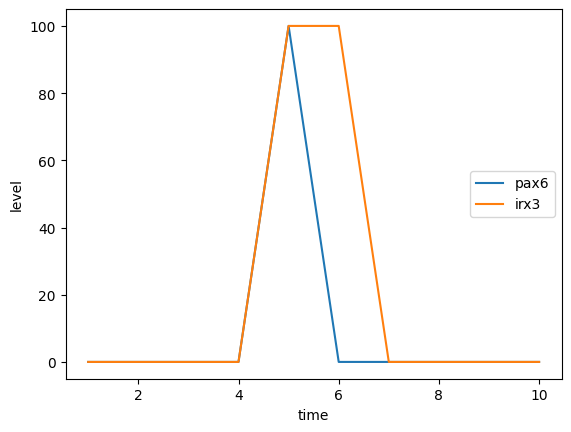

In [4]:
#plt.plot(conc_df.index, conc_df.nkx2, label='nkx2.2')
#plt.plot(conc_df.index, conc_df.olig2, label='olig2')
plt.plot(conc_df.index, conc_df.pax6, label='pax6')
plt.plot(conc_df.index, conc_df.irx3, label='irx3')


plt.xlabel('time')
plt.ylabel('level')
plt.legend(loc='center right')